In [20]:
# Importing the Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
# Data set for the Boston information
from sklearn.datasets import load_boston
boston_dataset = load_boston()
df = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
df['PRICE'] = boston_dataset.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


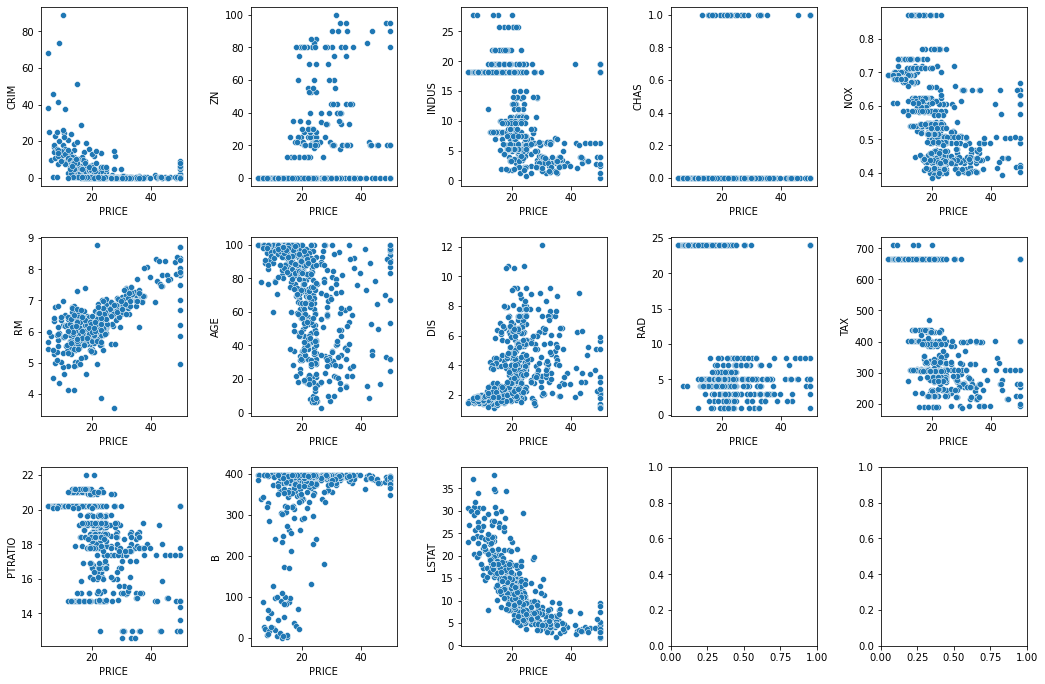

In [22]:
# Variables for the scatter plot
rows, cols = 3, 5
fig, axis = plt.subplots(rows, cols, figsize=(15, 10))
plt.tight_layout(pad=3.0)

# Variables set to each other 
variables = boston_dataset.feature_names
variables_size = len(variables)
colIndex = 0

# Loop for all the scattor plots
for row in range(rows):
  for col in range(cols):
    
    # Checking if the information as a value
    if(colIndex < variables_size):
      sns.scatterplot(data=df, x='PRICE', y=variables[colIndex], ax=axis[row][col])
      colIndex = colIndex + 1

In [23]:
# Spliting the data to run test and getting all input variables
from sklearn.model_selection import train_test_split
X = df.loc[:, df.columns != 'PRICE']
Y = df['PRICE']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
X_train.size, X_test.size

(4407, 2171)

In [24]:
# The linear regression to predict all of the house prices
from sklearn.linear_model import LinearRegression

model = LinearRegression().fit(X_train, Y_train)
# telling the program to make a predictions & report prices
Y_pred = model.predict(X_test)
Y_pred

array([28.53469469, 36.6187006 , 15.63751079, 25.5014496 , 18.7096734 ,
       23.16471591, 17.31011035, 14.07736367, 23.01064388, 20.54223482,
       24.91632351, 18.41098052, -6.52079687, 21.83372604, 19.14903064,
       26.0587322 , 20.30232625,  5.74943567, 40.33137811, 17.45791446,
       27.47486665, 30.2170757 , 10.80555625, 23.87721728, 17.99492211,
       16.02608791, 23.268288  , 14.36825207, 22.38116971, 19.3092068 ,
       22.17284576, 25.05925441, 25.13780726, 18.46730198, 16.60405712,
       17.46564046, 30.71367733, 20.05106788, 23.9897768 , 24.94322408,
       13.97945355, 31.64706967, 42.48057206, 17.70042814, 26.92507869,
       17.15897719, 13.68918087, 26.14924245, 20.2782306 , 29.99003492,
       21.21260347, 34.03649185, 15.41837553, 25.95781061, 39.13897274,
       22.96118424, 18.80310558, 33.07865362, 24.74384155, 12.83640958,
       22.41963398, 30.64804979, 31.59567111, 16.34088197, 20.9504304 ,
       16.70145875, 20.23215646, 26.1437865 , 31.12160889, 11.89

In [26]:
# Creating visualization to see dataset
out = {'Actual Price': [], 'Predicted Price': []}
out['Actual Price'] = np.array(Y_test)
out['Predicted Price'] = np.array(Y_pred)
out_df = pd.DataFrame(out)
out_df.head()

,Actual Price,Predicted Price
0,23.6,28.534695
1,32.4,36.618701
2,13.6,15.637511
3,22.8,25.501450
4,16.1,18.709673


In [12]:
# Getting the accurracy report of data
from sklearn.metrics import mean_squared_error
mean_squared_error(Y_test, Y_pred)

20.72402343733974

In [13]:
# Creating the polynomial regression to predict house prices in data
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [14]:
# Creating the model & reporting the predicates
poly = PolynomialFeatures(2)
X_train_ = poly.fit_transform(X_train)
X_test_ = poly.fit_transform(X_test)

model = LinearRegression().fit(X_train_, Y_train)
Y_pred = model.predict(X_test_)
Y_pred

array([ 26.51131892,  41.34272742,  14.05973744,  19.29451752,
        16.50196171,  15.91391659,  16.70114779,  13.32581353,
        21.6305294 ,  18.33741522,  15.55301595,  22.51559377,
        -0.98530126,  16.42507839,  18.30315351,  24.78592896,
        19.55328751,   8.90639257,  46.81346321,  12.49486828,
        24.04875851,  27.36737585,  15.90756059,  19.47754097,
        18.25315452,  17.55686569,  16.81211829,  13.96674871,
         9.22421503,  18.28579068,  20.29440331,  23.98826361,
        23.30916858,  25.71820426,  14.96596599,  18.05475879,
        30.13447189,  20.07965994,  16.2777257 ,  20.99731231,
        16.22392154,  31.28717661,  48.55796337,  15.54672933,
        26.80627918,  16.83686328,  15.28511095,  23.20162868,
        18.33712983,  27.94883037,  22.91518283,  37.04392076,
        17.03869271,  26.9284842 ,  45.93274593,  24.65019774,
        15.3720839 ,  30.55894589,  25.57461739,  18.77734613,
        25.26329446,  25.36807895,  30.92996716,  11.09

In [27]:
# Creating visualization to see dataset
out = {'Actual Price': [], 'Predicted Price': []}
out['Actual Price'] = np.array(Y_test)
out['Predicted Price'] = np.array(Y_pred)
out_df = pd.DataFrame(out)
out_df.head()

,Actual Price,Predicted Price
0,23.6,28.534695
1,32.4,36.618701
2,13.6,15.637511
3,22.8,25.501450
4,16.1,18.709673


In [28]:
# Applying the accurracy report for the dataset
from sklearn.metrics import mean_squared_error
mean_squared_error(Y_test, Y_pred)

20.72402343733974